In [ ]:
# Télécharger kaggle.json
from google.colab import files
uploaded = files.upload()

# Configurer Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Vérifier que Kaggle est configuré correctement
!kaggle datasets list


Saving kaggle.json to kaggle.json
ref                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
anandshaw2001/netflix-movies-and-tv-shows                      Netflix Movies and TV Shows                        1MB  2025-01-03 10:33:01           2624         73  1.0              
stealthtechnologies/predict-student-performance-dataset        Predict Student Performance                       12KB  2024-12-26 12:57:04           3572         83  1.0              
sebastianwillmann/beverage-sales                               Beverage Sales                                   119MB  2025-01-02 21:00:53            961         23  1.0              
suvroo/credit-card-behaviour-score            

In [ ]:
# Télécharger le dataset de la compétition Jigsaw Toxic Comment Classification Challenge
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

# Décompresser les fichiers téléchargés
import zipfile
import os

for file in os.listdir():
    if file.endswith(".zip"):
        with zipfile.ZipFile(file, 'r') as zip_ref:
            zip_ref.extractall()


jigsaw-toxic-comment-classification-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


Aperçu des données :
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  

Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 # 

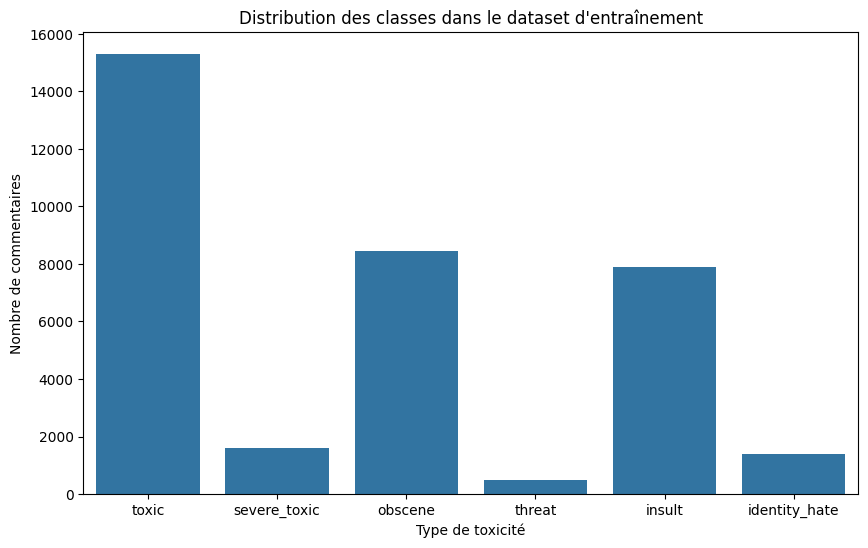


Statistiques descriptives des longueurs de commentaires :
count    159571.000000
mean        394.073221
std         590.720282
min           6.000000
25%          96.000000
50%         205.000000
75%         435.000000
max        5000.000000
Name: comment_length, dtype: float64


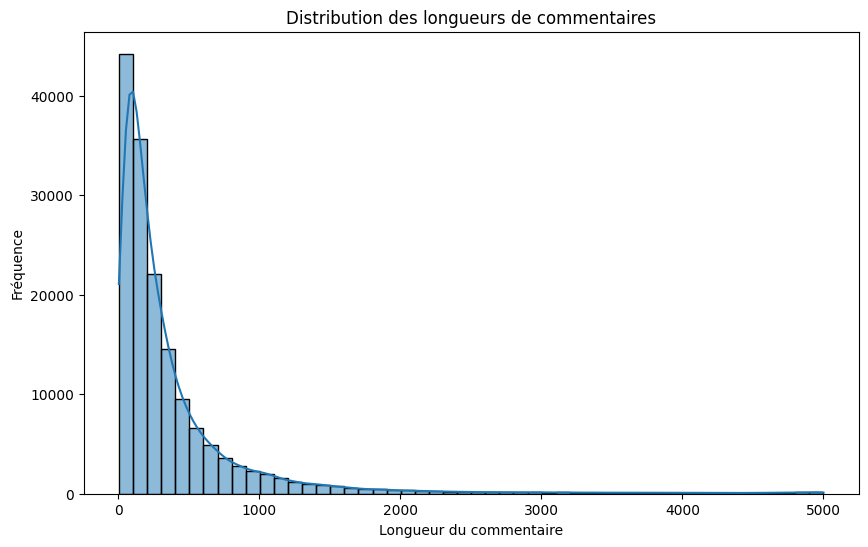

In [ ]:
# Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données d'entraînement
train_data = pd.read_csv("train.csv")

# Aperçu des données
print("Aperçu des données :")
print(train_data.head())

# Vérifier les informations sur le dataset
print("\nInformations sur le dataset :")
train_data.info()

# Vérifier les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(train_data.isnull().sum())

# Distribution des classes
label_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = train_data[label_columns].sum()

print("\nDistribution des classes (nombre de commentaires positifs pour chaque type) :")
print(label_counts)

# Visualiser la distribution des classes
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution des classes dans le dataset d'entraînement")
plt.ylabel("Nombre de commentaires")
plt.xlabel("Type de toxicité")
plt.show()

# Longueur des commentaires
train_data['comment_length'] = train_data['comment_text'].str.len()
print("\nStatistiques descriptives des longueurs de commentaires :")
print(train_data['comment_length'].describe())

# Visualiser la distribution des longueurs de commentaires
plt.figure(figsize=(10, 6))
sns.histplot(train_data['comment_length'], bins=50, kde=True)
plt.title("Distribution des longueurs de commentaires")
plt.xlabel("Longueur du commentaire")
plt.ylabel("Fréquence")
plt.show()


Exemple avant nettoyage :
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Exemple après nettoyage :
explanation why the edits made under my username hardcore metallica fan were reverted they weren't vandalisms just closure on some gas after i voted at new york dolls fac and please don't remove the template from the talk page since i'm retired now

Statistiques descriptives des longueurs nettoyées :
count    159571.000000
mean        373.600103
std         562.658729
min           0.000000
25%          88.000000
50%         193.000000
75%         414.000000
max        5000.000000
Name: cleaned_comment_length, dtype: float64


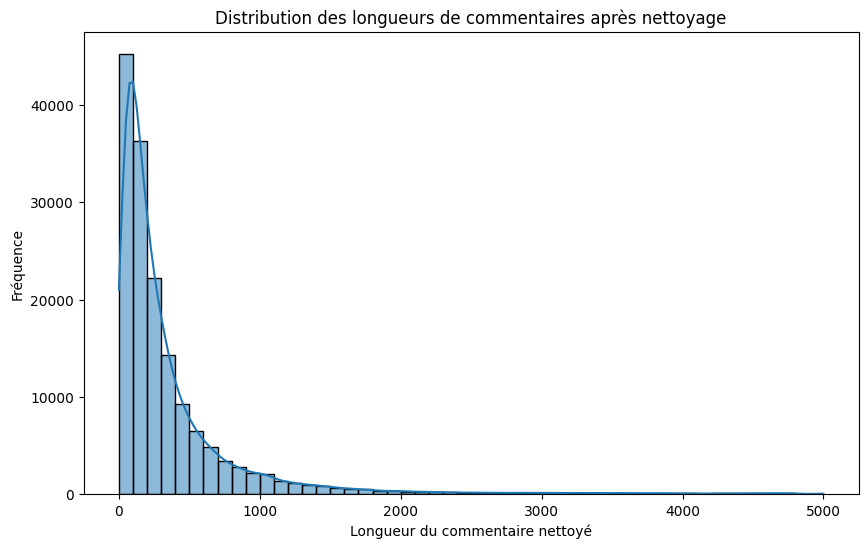

In [ ]:
import re

# Fonction de nettoyage du texte
def clean_text(text):
    # Conversion en minuscules
    text = text.lower()
    # Suppression des URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Suppression des caractères spéciaux et de la ponctuation
    text = re.sub(r'\@|\#|\%|\$|\&|\*|\(|\)|\+|\=|\-|\/|\_|\.|\,|\;|\:|\!|\?', ' ', text)
    # Suppression des nombres
    text = re.sub(r'\d+', '', text)
    # Suppression des espaces multiples
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Application de la fonction de nettoyage sur la colonne 'comment_text'
train_data['cleaned_comment_text'] = train_data['comment_text'].apply(clean_text)

# Aperçu des commentaires avant et après nettoyage
print("Exemple avant nettoyage :")
print(train_data['comment_text'].iloc[0])
print("\nExemple après nettoyage :")
print(train_data['cleaned_comment_text'].iloc[0])

# Statistiques descriptives sur les longueurs après nettoyage
train_data['cleaned_comment_length'] = train_data['cleaned_comment_text'].str.len()
print("\nStatistiques descriptives des longueurs nettoyées :")
print(train_data['cleaned_comment_length'].describe())

# Visualisation de la distribution des longueurs nettoyées
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_data['cleaned_comment_length'], bins=50, kde=True)
plt.title("Distribution des longueurs de commentaires après nettoyage")
plt.xlabel("Longueur du commentaire nettoyé")
plt.ylabel("Fréquence")
plt.show()


Nombre de commentaires avant suppression des commentaires vides : 159571
Nombre de commentaires après suppression des commentaires vides : 159555


<ipython-input-8-befda48bd8bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['truncated_comment_text'] = train_data['cleaned_comment_text'].str[:MAX_LENGTH]
<ipython-input-8-befda48bd8bf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['truncated_comment_length'] = train_data['truncated_comment_text'].str.len()



Statistiques descriptives des longueurs tronquées :
count    159555.000000
mean        188.021347
std         103.580914
min           1.000000
25%          88.000000
50%         193.000000
75%         300.000000
max         300.000000
Name: truncated_comment_length, dtype: float64


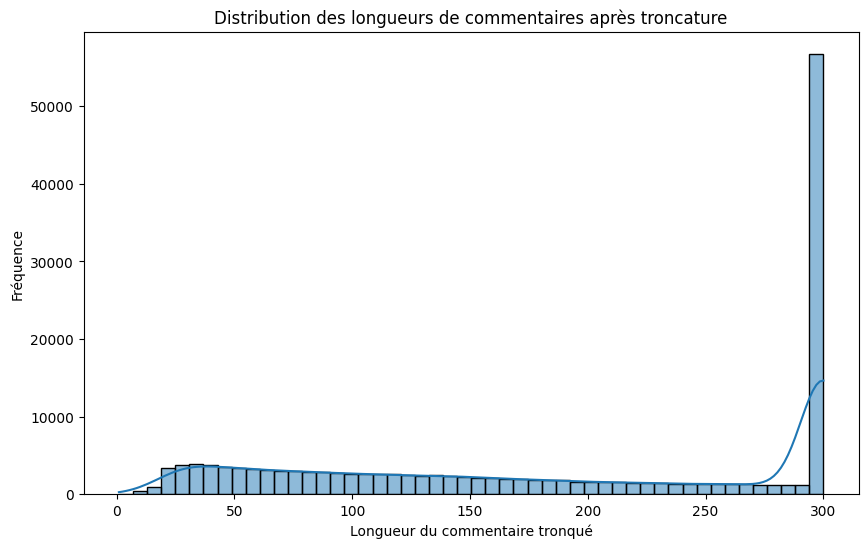


Exemple après nettoyage complet et troncature :
                                cleaned_comment_text  \
0  explanation why the edits made under my userna...   
1  d'aww he matches this background colour i'm se...   
2  hey man i'm really not trying to edit war it's...   
3  " more i can't make any real suggestions on im...   
4  you sir are my hero any chance you remember wh...   

                              truncated_comment_text  
0  explanation why the edits made under my userna...  
1  d'aww he matches this background colour i'm se...  
2  hey man i'm really not trying to edit war it's...  
3  " more i can't make any real suggestions on im...  
4  you sir are my hero any chance you remember wh...  


In [ ]:
# Suppression des commentaires vides
print("Nombre de commentaires avant suppression des commentaires vides :", len(train_data))
train_data = train_data[train_data['cleaned_comment_text'].str.strip().str.len() > 0]
print("Nombre de commentaires après suppression des commentaires vides :", len(train_data))

# Troncature des commentaires longs (fixer une longueur maximale)
MAX_LENGTH = 300  # Définir la longueur maximale (modifiable selon les besoins)
train_data['truncated_comment_text'] = train_data['cleaned_comment_text'].str[:MAX_LENGTH]

# Statistiques descriptives après troncature
train_data['truncated_comment_length'] = train_data['truncated_comment_text'].str.len()
print("\nStatistiques descriptives des longueurs tronquées :")
print(train_data['truncated_comment_length'].describe())

# Visualisation de la distribution des longueurs après troncature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_data['truncated_comment_length'], bins=50, kde=True)
plt.title("Distribution des longueurs de commentaires après troncature")
plt.xlabel("Longueur du commentaire tronqué")
plt.ylabel("Fréquence")
plt.show()

# Aperçu avant et après troncature
print("\nExemple après nettoyage complet et troncature :")
print(train_data[['cleaned_comment_text', 'truncated_comment_text']].head())


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Configuration du vecteur TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,  # Limite le vocabulaire à 10 000 mots les plus fréquents
    min_df=2,            # Ignore les mots apparaissant dans moins de 2 commentaires
    max_df=0.95,         # Ignore les mots apparaissant dans plus de 95% des commentaires
    stop_words='english' # Supprime les stopwords courants en anglais
)

# Application du TF-IDF sur les commentaires tronqués
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['truncated_comment_text'])

# Afficher la taille de la matrice
print(f"Dimensions de la matrice TF-IDF : {tfidf_matrix.shape}")


Dimensions de la matrice TF-IDF : (159555, 10000)


In [ ]:
# Afficher quelques mots du vocabulaire
print("Quelques mots du vocabulaire :", list(tfidf_vectorizer.get_feature_names_out()[:20]))


Quelques mots du vocabulaire : ['aa', 'aaron', 'ab', 'abandoned', 'abbey', 'abbreviation', 'abbreviations', 'abc', 'abd', 'abide', 'abilities', 'ability', 'able', 'abo', 'abolished', 'abortion', 'abou', 'abraham', 'abroad', 'absence']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Séparer les données en train/test
X_train, X_val, y_train, y_val = train_test_split(
    tfidf_matrix,
    train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
    test_size=0.2,
    random_state=42
)

# Initialiser un modèle pour chaque type de toxicité
models = {}
roc_auc_scores = {}

for label in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f"\nEntraînement pour la classe : {label}")

    # Initialiser et entraîner le modèle
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train[label])

    # Prédictions et évaluation
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val[label], y_pred)

    # Stocker le modèle et le score
    models[label] = model
    roc_auc_scores[label] = auc

    print(f"ROC AUC pour {label}: {auc:.4f}")

# Afficher le ROC AUC moyen
mean_auc = sum(roc_auc_scores.values()) / len(roc_auc_scores)
print(f"\nROC AUC moyen : {mean_auc:.4f}")



Entraînement pour la classe : toxic
ROC AUC pour toxic: 0.9630

Entraînement pour la classe : severe_toxic
ROC AUC pour severe_toxic: 0.9842

Entraînement pour la classe : obscene
ROC AUC pour obscene: 0.9761

Entraînement pour la classe : threat
ROC AUC pour threat: 0.9702

Entraînement pour la classe : insult
ROC AUC pour insult: 0.9665

Entraînement pour la classe : identity_hate
ROC AUC pour identity_hate: 0.9715

ROC AUC moyen : 0.9719


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Téléchargement de GloVe (50 dimensions, modifiable selon les besoins)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Charger les embeddings pré-entraînés GloVe
embedding_index = {}
with open("glove.6B.50d.txt", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefficients

print(f"Nombre total de mots dans GloVe : {len(embedding_index)}")

# Tokenisation du texte
MAX_WORDS = 10000  # Taille maximale du vocabulaire
MAX_SEQUENCE_LENGTH = 300  # Longueur maximale des séquences

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(train_data['truncated_comment_text'])
word_index = tokenizer.word_index
print(f"Nombre total de mots dans le vocabulaire : {len(word_index)}")

# Transformation des commentaires en séquences
sequences = tokenizer.texts_to_sequences(train_data['truncated_comment_text'])
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Création de la matrice d'embeddings
EMBEDDING_DIM = 50  # Dimension des vecteurs GloVe
embedding_matrix = np.zeros((MAX_WORDS, EMBEDDING_DIM))
for word, i in word_index.items():
    if i < MAX_WORDS:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

print("Matrice d'embeddings créée avec succès.")


--2025-01-13 15:49:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-13 15:49:02--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-13 15:49:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Construction du modèle
model = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH, trainable=False),
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(6, activation="sigmoid")  # 6 sorties pour les labels multilabel
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# Diviser les données en train/validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    data,
    train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
    test_size=0.2,
    random_state=42
)

# Entraînement du modèle
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=128,
    verbose=1
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 500,000 (1.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 500,000 (1.91 MB)

Epoch 1/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 56s 48ms/step - accuracy: 0.6223 - loss: 0.1259 - val_accuracy: 0.9942 - val_loss: 0.0621
Epoch 2/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - accuracy: 0.9091 - loss: 0.0629 - val_accuracy: 0.9942 - val_loss: 0.0580
Epoch 3/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 83s 50ms/step - accuracy: 0.9534 - loss: 0.0593 - val_accuracy: 0.9942 - val_loss: 0.0562
Epoch 4/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.9608 - loss: 0.0569 - val_accuracy: 0.9942 - val_loss: 0.0546
Epoch 5/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 76s 52ms/step - accuracy: 0.9559 - loss: 0.0536 - val_accuracy: 0.9942 - val_loss: 0.0540


In [ ]:
from sklearn.metrics import roc_auc_score

# Prédictions
y_pred = model.predict(X_val)

# Calcul du ROC AUC pour chaque classe
roc_auc_scores = {}
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    roc_auc = roc_auc_score(y_val[label], y_pred[:, i])
    roc_auc_scores[label] = roc_auc
    print(f"ROC AUC pour {label}: {roc_auc:.4f}")

# Score moyen
mean_roc_auc = np.mean(list(roc_auc_scores.values()))
print(f"\nScore ROC AUC moyen : {mean_roc_auc:.4f}")


998/998 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step
ROC AUC pour toxic: 0.9653
ROC AUC pour severe_toxic: 0.9875
ROC AUC pour obscene: 0.9773
ROC AUC pour threat: 0.9651
ROC AUC pour insult: 0.9698
ROC AUC pour identity_hate: 0.9704

Score ROC AUC moyen : 0.9726


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import numpy as np

# Grille d'hyperparamètres pour la régression logistique
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # Essayer 'l1' si sparse matrix compatible
    'solver': ['lbfgs', 'liblinear']
}

# Diviser les données TF-IDF en train et validation
from sklearn.model_selection import train_test_split

X_tfidf_train, X_tfidf_val, y_tfidf_train, y_tfidf_val = train_test_split(
    tfidf_matrix,
    train_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']],
    test_size=0.2,
    random_state=42
)

# Résultats pour chaque label
best_params = {}
models_tfidf = {}  # Sauvegarde des meilleurs modèles
y_pred_tfidf_val = np.zeros((X_tfidf_val.shape[0], 6))  # Stocker les prédictions

for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    print(f"Optimisation pour la classe : {label}")

    # Initialiser la recherche en grille
    grid = GridSearchCV(
        LogisticRegression(max_iter=1000),
        param_grid,
        scoring='roc_auc',
        cv=3
    )

    # Entraîner GridSearchCV sur le train pour chaque classe
    grid.fit(X_tfidf_train, y_tfidf_train[label])

    # Sauvegarder le meilleur modèle et ses paramètres
    models_tfidf[label] = grid.best_estimator_
    best_params[label] = grid.best_params_

    # Générer les prédictions pour la validation
    y_pred_tfidf_val[:, i] = models_tfidf[label].predict_proba(X_tfidf_val)[:, 1]

    # Afficher les résultats
    print(f"Meilleurs paramètres : {grid.best_params_}")
    print(f"Meilleur ROC AUC pour {label}: {grid.best_score_:.4f}")

# Résumé des résultats
print("\nMeilleurs paramètres par classe :")
print(best_params)



Optimisation pour la classe : toxic
Meilleurs paramètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur ROC AUC pour toxic: 0.9587
Optimisation pour la classe : severe_toxic
Meilleurs paramètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur ROC AUC pour severe_toxic: 0.9841
Optimisation pour la classe : obscene
Meilleurs paramètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur ROC AUC pour obscene: 0.9744
Optimisation pour la classe : threat
Meilleurs paramètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur ROC AUC pour threat: 0.9737
Optimisation pour la classe : insult
Meilleurs paramètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur ROC AUC pour insult: 0.9678
Optimisation pour la classe : identity_hate
Meilleurs paramètres : {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Meilleur ROC AUC pour identity_hate: 0.9653

Meilleurs paramètres par classe :
{'toxic': {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}, 'se

In [ ]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

# Nouvelle architecture pour GloVe
model_glove = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=EMBEDDING_DIM, weights=[embedding_matrix],
              input_length=MAX_SEQUENCE_LENGTH, trainable=False),
    GRU(128, return_sequences=False),
    Dropout(0.5),
    Dense(6, activation="sigmoid")
])

# Optimisation des hyperparamètres
learning_rate = 1e-3  # À ajuster
batch_size = 64  # Essayer 32 ou 128 pour comparer

# Compilation
model_glove.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=learning_rate),
    metrics=["accuracy"]
)

# Entraînement avec validation
history_glove = model_glove.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=batch_size
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - accuracy: 0.7479 - loss: 0.0991 - val_accuracy: 0.9916 - val_loss: 0.0612
Epoch 2/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9335 - loss: 0.0601 - val_accuracy: 0.9903 - val_loss: 0.0563
Epoch 3/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9352 - loss: 0.0573 - val_accuracy: 0.9936 - val_loss: 0.0541
Epoch 4/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - accuracy: 0.9455 - loss: 0.0539 - val_accuracy: 0.9875 - val_loss: 0.0535
Epoch 5/5
1995/1995 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9217 - loss: 0.0526 - val_accuracy: 0.9890 - val_loss: 0.0519


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Prédictions GloVe (déjà générées avec model_glove)
y_pred_glove = model_glove.predict(X_val)  # Générer les prédictions avec le modèle GloVe

# Générer les prédictions TF-IDF sur le set de validation
y_pred_tfidf_val = np.zeros((X_tfidf_val.shape[0], 6))
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    y_pred_tfidf_val[:, i] = models_tfidf[label].predict_proba(X_tfidf_val)[:, 1]

# Moyenne des prédictions TF-IDF et GloVe
y_ensemble = (y_pred_tfidf_val + y_pred_glove) / 2

# Évaluer les performances de l’ensemble
roc_auc_scores_ensemble = {}
for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    roc_auc = roc_auc_score(y_tfidf_val[label], y_ensemble[:, i])
    roc_auc_scores_ensemble[label] = roc_auc
    print(f"ROC AUC pour {label}: {roc_auc:.4f}")

# Score ROC AUC moyen
mean_roc_auc_ensemble = np.mean(list(roc_auc_scores_ensemble.values()))
print(f"\nScore ROC AUC moyen pour l'ensemble : {mean_roc_auc_ensemble:.4f}")


998/998 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step
ROC AUC pour toxic: 0.9720
ROC AUC pour severe_toxic: 0.9880
ROC AUC pour obscene: 0.9816
ROC AUC pour threat: 0.9868
ROC AUC pour insult: 0.9743
ROC AUC pour identity_hate: 0.9823

Score ROC AUC moyen pour l'ensemble : 0.9808



Matrice de confusion pour la classe 'toxic':
Vrais négatifs (TN): 28639, Faux positifs (FP): 196
Faux négatifs (FN): 1120, Vrais positifs (TP): 1956


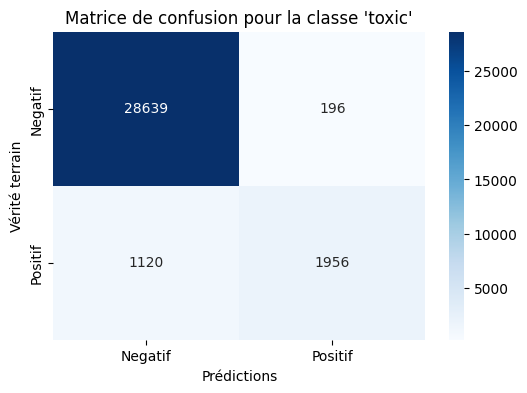


Matrice de confusion pour la classe 'severe_toxic':
Vrais négatifs (TN): 31513, Faux positifs (FP): 58
Faux négatifs (FN): 254, Vrais positifs (TP): 86


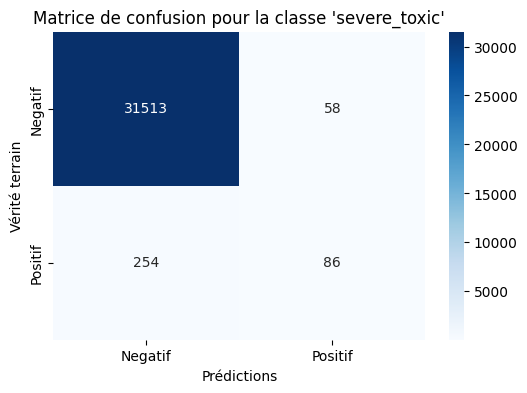


Matrice de confusion pour la classe 'obscene':
Vrais négatifs (TN): 30061, Faux positifs (FP): 129
Faux négatifs (FN): 566, Vrais positifs (TP): 1155


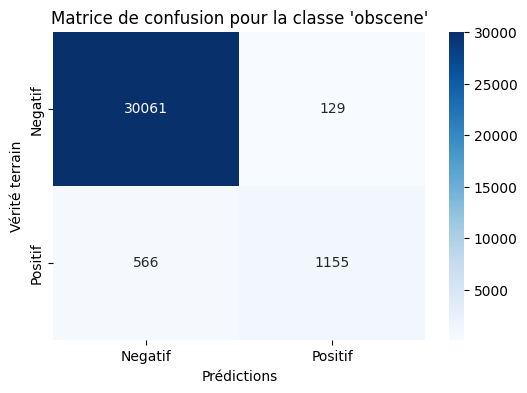


Matrice de confusion pour la classe 'threat':
Vrais négatifs (TN): 31801, Faux positifs (FP): 12
Faux négatifs (FN): 78, Vrais positifs (TP): 20


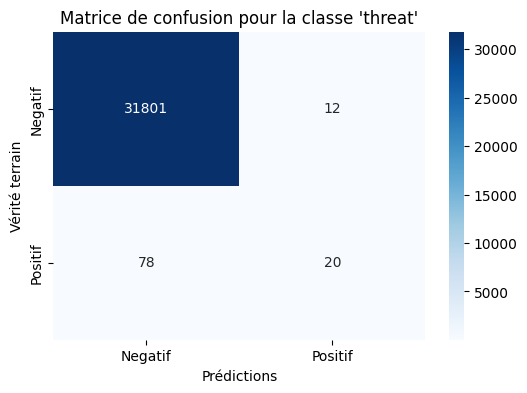


Matrice de confusion pour la classe 'insult':
Vrais négatifs (TN): 30103, Faux positifs (FP): 222
Faux négatifs (FN): 663, Vrais positifs (TP): 923


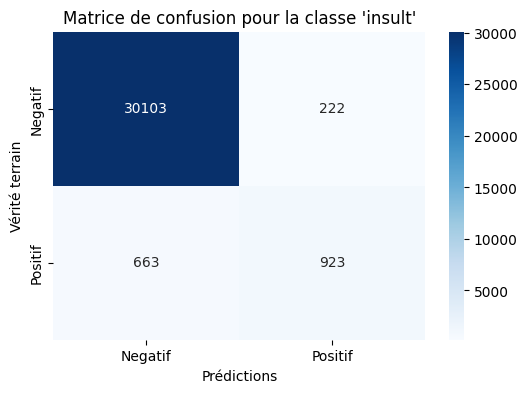


Matrice de confusion pour la classe 'identity_hate':
Vrais négatifs (TN): 31604, Faux positifs (FP): 21
Faux négatifs (FN): 226, Vrais positifs (TP): 60


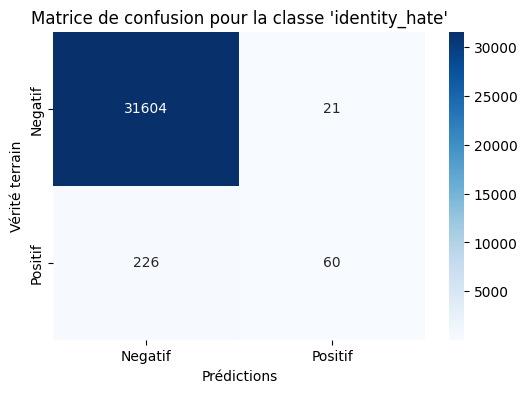

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Construire et afficher une matrice de confusion pour chaque classe
threshold = 0.5  # Seuil pour convertir les probabilités en classes binaires
y_ensemble_labels = (y_ensemble >= threshold).astype(int)

for i, label in enumerate(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']):
    cm = confusion_matrix(y_tfidf_val[label], y_ensemble_labels[:, i])
    tn, fp, fn, tp = cm.ravel()

    print(f"\nMatrice de confusion pour la classe '{label}':")
    print(f"Vrais négatifs (TN): {tn}, Faux positifs (FP): {fp}")
    print(f"Faux négatifs (FN): {fn}, Vrais positifs (TP): {tp}")

    # Visualisation avec Seaborn
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
    plt.title(f"Matrice de confusion pour la classe '{label}'")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérité terrain")
    plt.show()


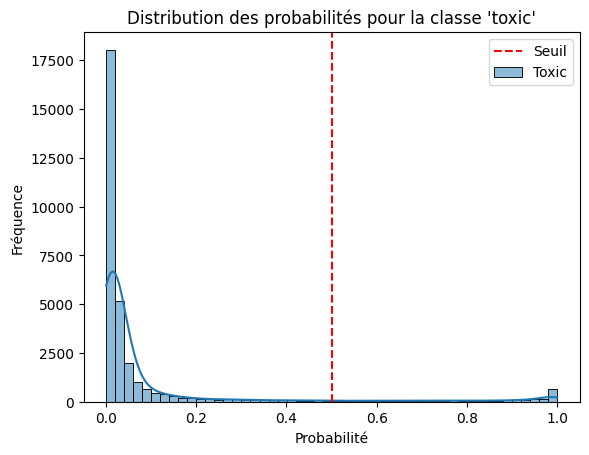

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple pour la classe 'toxic'
sns.histplot(y_ensemble[:, 0], bins=50, kde=True, label='Toxic')
plt.axvline(threshold, color='r', linestyle='--', label='Seuil')
plt.title("Distribution des probabilités pour la classe 'toxic'")
plt.xlabel("Probabilité")
plt.ylabel("Fréquence")
plt.legend()
plt.show()
